<a href="https://colab.research.google.com/github/bskarthik05/Task_3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn-v0_8-whitegrid')

In [36]:
try:
    df = pd.read_csv('/content/sample_data/Housing.csv')
except FileNotFoundError:
    print("Error: 'Housing.csv' not found. Please upload the file to your Colab session.")
    exit()

In [37]:
print("Dataset Head:")
print(df.head())

Dataset Head:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [38]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [39]:
print("Check for Missing Values:")
print(df.isnull().sum())

Check for Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Data Preprocessing

In [40]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] # [cite: 1]
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [41]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [42]:
print("Dataset Head After Preprocessing:")
print(df.head())

Dataset Head After Preprocessing:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                       

In [43]:
print("Dataset Info After Preprocessing:")
df.info()

Dataset Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus

Simple Linear Regression (Price vs. Area

In [44]:
X_simple = df[['area']]

In [45]:
y_simple = df['price']

In [46]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

In [47]:
print("Simple Linear Regression Data Shapes:")
print("X_train_simple shape:", X_train_simple.shape)
print("X_test_simple shape:", X_test_simple.shape)
print("y_train_simple shape:", y_train_simple.shape)
print("y_test_simple shape:", y_test_simple.shape)

Simple Linear Regression Data Shapes:
X_train_simple shape: (436, 1)
X_test_simple shape: (109, 1)
y_train_simple shape: (436,)
y_test_simple shape: (109,)


In [48]:
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train_simple, y_train_simple)

LinearRegression()

In [49]:
print("Simple Linear Regression Model Fitted.")
print(f"Intercept (alpha/beta_0): {simple_lr_model.intercept_:.2f}")
print(f"Coefficient for 'area' (beta_1): {simple_lr_model.coef_[0]:.2f}")

Simple Linear Regression Model Fitted.
Intercept (alpha/beta_0): 2512254.26
Coefficient for 'area' (beta_1): 425.73


In [50]:
y_pred_simple = simple_lr_model.predict(X_test_simple)

In [51]:
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

In [52]:
print("Simple Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_simple:,.2f}")
print(f"Mean Squared Error (MSE): {mse_simple:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple:,.2f}")
print(f"R-squared (R²): {r2_simple:.4f}")

Simple Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 1,474,748.13
Mean Squared Error (MSE): 3,675,286,604,768.19
Root Mean Squared Error (RMSE): 1,917,103.70
R-squared (R²): 0.2729


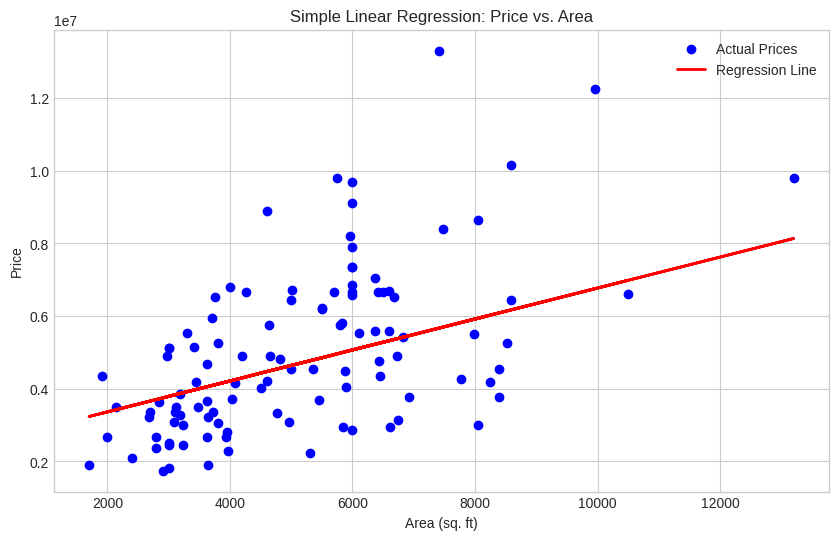

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Prices')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Area (sq. ft)")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Price vs. Area")
plt.legend()
plt.show()

In [54]:
print("Interpretation of Simple Linear Regression Coefficients:")
print(f"The intercept (alpha or β₀) is approximately {simple_lr_model.intercept_:,.2f}.")
print("This is the estimated price of a house when the area is 0 sq. ft, which is often not practically meaningful in this context but is a necessary part of the model.")
print(f"The coefficient for 'area' (β₁) is approximately {simple_lr_model.coef_[0]:,.2f}.")
print("This means that for each additional square foot of area, the price of the house is predicted to increase by this amount, holding all other factors constant (though in simple regression, we only consider area).")

Interpretation of Simple Linear Regression Coefficients:
The intercept (alpha or β₀) is approximately 2,512,254.26.
This is the estimated price of a house when the area is 0 sq. ft, which is often not practically meaningful in this context but is a necessary part of the model.
The coefficient for 'area' (β₁) is approximately 425.73.
This means that for each additional square foot of area, the price of the house is predicted to increase by this amount, holding all other factors constant (though in simple regression, we only consider area).


Multiple Linear Regression

In [55]:
X_multiple = df.drop('price', axis=1)

In [56]:
y_multiple = df['price']

In [57]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42
)

In [58]:
print("Multiple Linear Regression Data Shapes:")
print("X_train_multiple shape:", X_train_multiple.shape)
print("X_test_multiple shape:", X_test_multiple.shape)
print("y_train_multiple shape:", y_train_multiple.shape)
print("y_test_multiple shape:", y_test_multiple.shape)

Multiple Linear Regression Data Shapes:
X_train_multiple shape: (436, 13)
X_test_multiple shape: (109, 13)
y_train_multiple shape: (436,)
y_test_multiple shape: (109,)


In [59]:
multiple_lr_model = LinearRegression()
multiple_lr_model.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [60]:
print("Multiple Linear Regression Model Fitted.")
print(f"Intercept (alpha/beta_0): {multiple_lr_model.intercept_:.2f}")
print("\nCoefficients (beta_i):")
coefficients = pd.DataFrame(multiple_lr_model.coef_, X_multiple.columns, columns=['Coefficient'])
print(coefficients)

Multiple Linear Regression Model Fitted.
Intercept (alpha/beta_0): 260032.36

Coefficients (beta_i):
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [61]:
y_pred_multiple = multiple_lr_model.predict(X_test_multiple)

In [62]:
mae_multiple = mean_absolute_error(y_test_multiple, y_pred_multiple)
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

In [63]:
print("Multiple Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_multiple:,.2f}")
print(f"Mean Squared Error (MSE): {mse_multiple:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multiple:,.2f}")
print(f"R-squared (R²): {r2_multiple:.4f}")

Multiple Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 970,043.40
Mean Squared Error (MSE): 1,754,318,687,330.66
Root Mean Squared Error (RMSE): 1,324,506.96
R-squared (R²): 0.6529


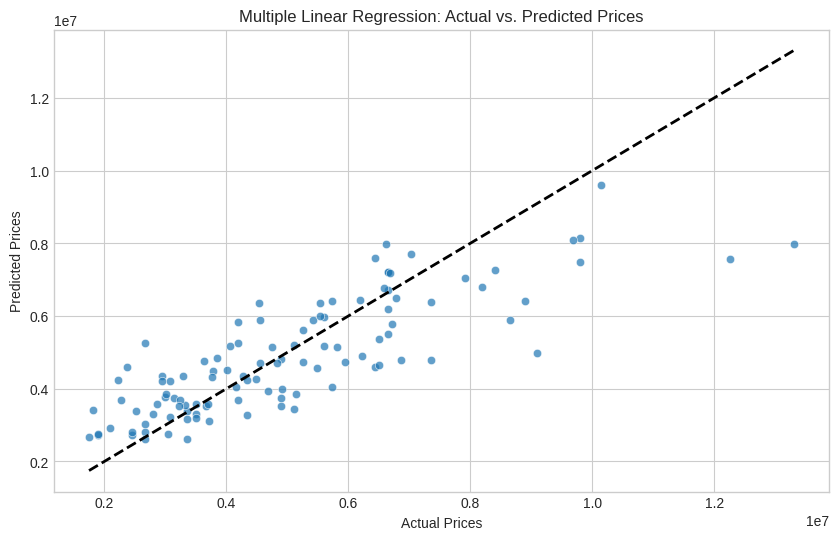

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multiple, y_pred_multiple, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([y_test_multiple.min(), y_test_multiple.max()], [y_test_multiple.min(), y_test_multiple.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Linear Regression: Actual vs. Predicted Prices")
plt.show()

In [65]:
print("Interpretation of Multiple Linear Regression Coefficients:")
print(f"The intercept (alpha or β₀) is approximately {multiple_lr_model.intercept_:,.2f}.")
print("This is the estimated price when all independent variables are zero. Its practical interpretation depends on whether zero is a meaningful value for all predictors.")
print("\nThe coefficients for each feature are as follows:")
print(coefficients)

Interpretation of Multiple Linear Regression Coefficients:
The intercept (alpha or β₀) is approximately 260,032.36.
This is the estimated price when all independent variables are zero. Its practical interpretation depends on whether zero is a meaningful value for all predictors.

The coefficients for each feature are as follows:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
